In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

2. Load the dataset into the tool.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [4]:
df = pd.DataFrame(data)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


3.Perform below Visualizations
(i) Univariate Analysis

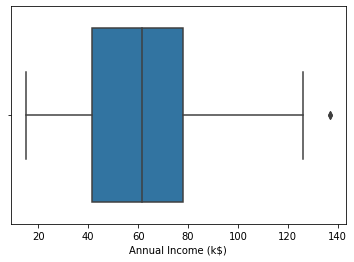

In [7]:
sns.boxplot(df['Annual Income (k$)'])

(ii)Bivariate Analysis

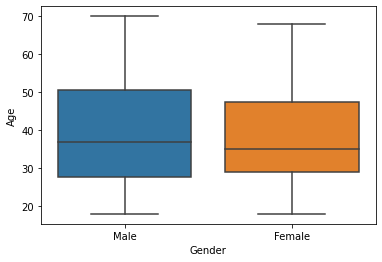

In [8]:
gender = df['Gender']
age = df['Age']
sns.boxplot(gender,age)

(iii)Multivariate Analysis

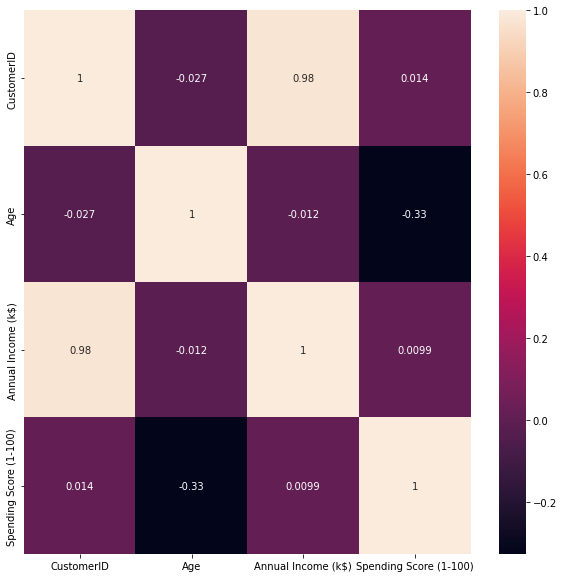

In [9]:
plt.figure(figsize=(10, 10))
corr = df.corr()
_ = sns.heatmap(corr, annot=True)

4. Perform descriptive statistics on the dataset.


In [10]:
df['Age'].mean()

38.85

In [11]:
x=round(df['Age'].mean())
print(x)

39


In [12]:
df['Age'].median()

36.0

In [13]:
df['Age'].mode()

0    32
dtype: int64

In [14]:
df['Age'].std()

13.96900733155888

In [15]:
y = round(df['Age'].std())
print(y)

14


5. Check for Missing values and deal with them.


In [16]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

6. Find the outliers and replace them outliers

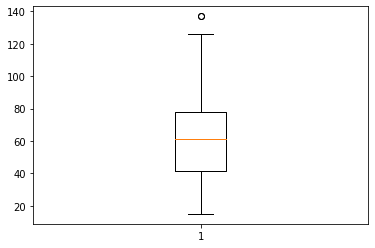

In [18]:
plt.boxplot(df['Annual Income (k$)'])
plt.show()

In [19]:
n = np.where(df['Annual Income (k$)']>120)
print(n)

(array([196, 197, 198, 199]),)


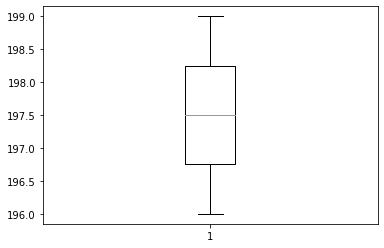

In [20]:
plt.boxplot(n)
plt.show()

7. Check for Categorical columns and perform encoding.

In [21]:
df_categorical = df['Gender']
df_categorical.head()

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [22]:
print(df['Gender'].unique())

['Male' 'Female']


In [23]:
from sklearn.preprocessing import LabelEncoder
Gender_encoder = LabelEncoder()
Gender_encoder.fit(df['Gender'])

LabelEncoder()

In [24]:
Gender_value = Gender_encoder.transform(df_categorical)
print(Gender_value[0:])

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


8. Scale the data

In [28]:
df.insert(0,"Gender_values",Gender_value)

In [30]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = df[['Age', 'Gender_values']]
scaledX = scale.fit_transform(X)
print(scaledX)

[[-1.42456879  1.12815215]
 [-1.28103541  1.12815215]
 [-1.3528021  -0.88640526]
 [-1.13750203 -0.88640526]
 [-0.56336851 -0.88640526]
 [-1.20926872 -0.88640526]
 [-0.27630176 -0.88640526]
 [-1.13750203 -0.88640526]
 [ 1.80493225  1.12815215]
 [-0.6351352  -0.88640526]
 [ 2.02023231  1.12815215]
 [-0.27630176 -0.88640526]
 [ 1.37433211 -0.88640526]
 [-1.06573534 -0.88640526]
 [-0.13276838  1.12815215]
 [-1.20926872  1.12815215]
 [-0.27630176 -0.88640526]
 [-1.3528021   1.12815215]
 [ 0.94373197  1.12815215]
 [-0.27630176 -0.88640526]
 [-0.27630176  1.12815215]
 [-0.99396865  1.12815215]
 [ 0.51313183 -0.88640526]
 [-0.56336851  1.12815215]
 [ 1.08726535 -0.88640526]
 [-0.70690189  1.12815215]
 [ 0.44136514 -0.88640526]
 [-0.27630176  1.12815215]
 [ 0.08253169 -0.88640526]
 [-1.13750203 -0.88640526]
 [ 1.51786549  1.12815215]
 [-1.28103541 -0.88640526]
 [ 1.01549866  1.12815215]
 [-1.49633548  1.12815215]
 [ 0.7284319  -0.88640526]
 [-1.28103541 -0.88640526]
 [ 0.22606507 -0.88640526]
 

9. Perform any of the clustering algorithms

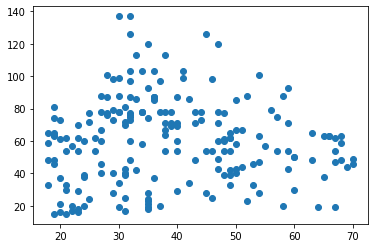

In [41]:
x = df['Age']
y = df['Annual Income (k$)']
plt.scatter(x, y)
plt.show()

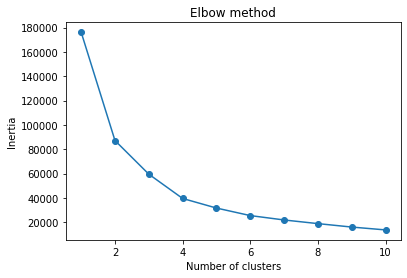

In [42]:
from sklearn.cluster import KMeans
data = list(zip(x, y))
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

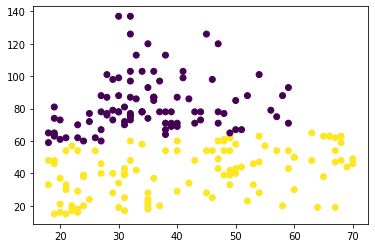

In [43]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

# 11. Split the data into dependent and independent variables.

In [44]:
X = df.iloc[:, 1:-1].values
print(X)

[[1 'Male' 19 15]
 [2 'Male' 21 15]
 [3 'Female' 20 16]
 [4 'Female' 23 16]
 [5 'Female' 31 17]
 [6 'Female' 22 17]
 [7 'Female' 35 18]
 [8 'Female' 23 18]
 [9 'Male' 64 19]
 [10 'Female' 30 19]
 [11 'Male' 67 19]
 [12 'Female' 35 19]
 [13 'Female' 58 20]
 [14 'Female' 24 20]
 [15 'Male' 37 20]
 [16 'Male' 22 20]
 [17 'Female' 35 21]
 [18 'Male' 20 21]
 [19 'Male' 52 23]
 [20 'Female' 35 23]
 [21 'Male' 35 24]
 [22 'Male' 25 24]
 [23 'Female' 46 25]
 [24 'Male' 31 25]
 [25 'Female' 54 28]
 [26 'Male' 29 28]
 [27 'Female' 45 28]
 [28 'Male' 35 28]
 [29 'Female' 40 29]
 [30 'Female' 23 29]
 [31 'Male' 60 30]
 [32 'Female' 21 30]
 [33 'Male' 53 33]
 [34 'Male' 18 33]
 [35 'Female' 49 33]
 [36 'Female' 21 33]
 [37 'Female' 42 34]
 [38 'Female' 30 34]
 [39 'Female' 36 37]
 [40 'Female' 20 37]
 [41 'Female' 65 38]
 [42 'Male' 24 38]
 [43 'Male' 48 39]
 [44 'Female' 31 39]
 [45 'Female' 49 39]
 [46 'Female' 24 39]
 [47 'Female' 50 40]
 [48 'Female' 27 40]
 [49 'Female' 29 40]
 [50 'Female' 31

In [45]:
Y = df.iloc[:, -1].values
print(Y)

[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47 55 42
 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40 42 52
 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59 43 57
 56 40 58 91 29 77 35 95 11 75  9 75 34 71  5 88  7 73 10 72  5 93 40 87
 12 97 36 74 22 90 17 88 20 76 16 89  1 78  1 73 35 83  5 93 26 75 20 95
 27 63 13 75 10 92 13 86 15 69 14 90 32 86 15 88 39 97 24 68 17 85 23 69
  8 91 16 79 28 74 18 83]


12. Split the data into training and testing

In [46]:
from sklearn.model_selection import train_test_split
A,B = train_test_split(df,test_size=0.30,random_state=42)

In [47]:
A = pd.get_dummies(A)
B = pd.get_dummies(B)
A.shape

(140, 7)

In [48]:
B.shape

(60, 7)

In [49]:
x_train=A.drop('Age',axis=1)
y_train=A["Age"]
x_test=B.drop('Age',axis=1)
y_test=B["Age"]

In [50]:
x_train.shape

(140, 6)

In [51]:
y_train.shape

(140,)

In [52]:
x_test.shape

(60, 6)

In [53]:
y_test.shape

(60,)

13. Build the Model

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


14.Train the model

In [57]:
a = np.array(Gender_value).reshape(-1, 1)
b = np.array(df['Age'])
model.fit(a,b)

LinearRegression()

15. Test the model

In [58]:
y_train = np.array(y_train).reshape(-1,1)
y_pred = model.predict(y_train)
y_pred.shape

(140,)

16. Measure the performance using Evaluation Metrics.

In [59]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_train,y_pred))

65.52624652133584


In [60]:
print(metrics.mean_squared_error(y_train,y_pred))

4393.277183591211


In [61]:
print(metrics.r2_score(y_train,y_pred))

-21.15071717946404
